In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import popsims
from popsims.simulator import Population, pop_mags
from popsims.galaxy import Disk, Halo
from popsims.plot_style import  plot_style

plot_style()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#draw masses from a power-law IMF and uniform ages
#obtain temperatures from Baraffe et al.2003 relations
p=Population(evolmodel= 'baraffe2003',
              imf_power= -0.6,
              binary_fraction=0.2,
              age_range=[0.01, 14],
              mass_range=[0.01, 1],
             nsample=1e6)
    
p.simulate()

In [3]:
#define a galaxy density model and draw distances in a given direction
disk= Disk(H=300, L=2600)
tdisk=Disk(H=900, L=3600)
halo= Halo()
model= disk+0.12*tdisk+(1/400)*halo
p.add_distances(model, 0, np.pi/3,0.1, 1000, dsteps=5000)

In [4]:
#add magnitudes from pre-defined filters or pre-define polynomial cofficients
p.add_magnitudes(['LSST_G', 'LSST_R', 'LSST_I', 'LSST_Y',  'LSST_Z'], get_from='spt')

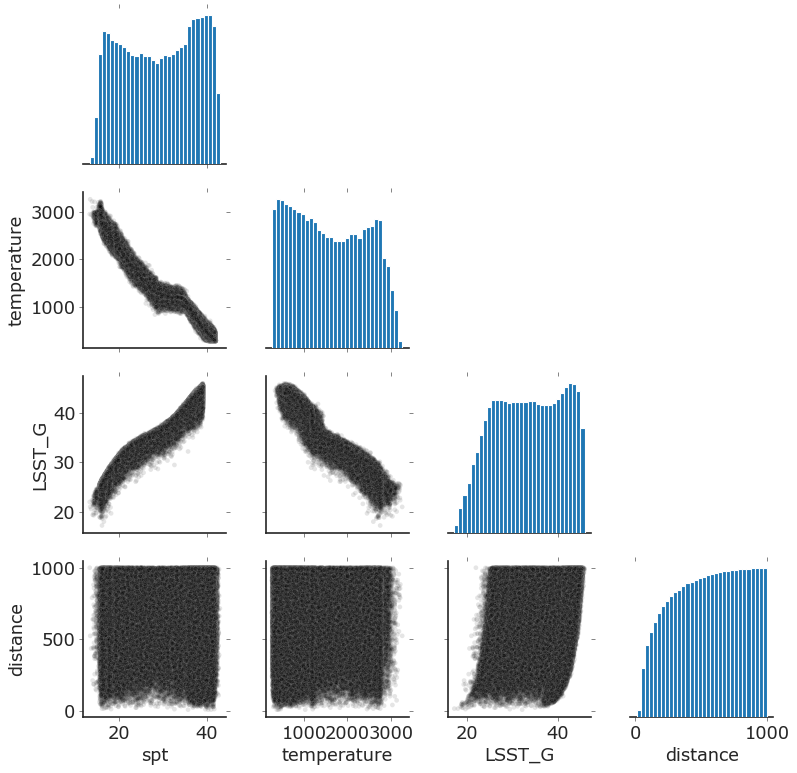

In [5]:
p.visualize(keys=['spt', 'temperature', 'abs_LSST_G', 'distance'])

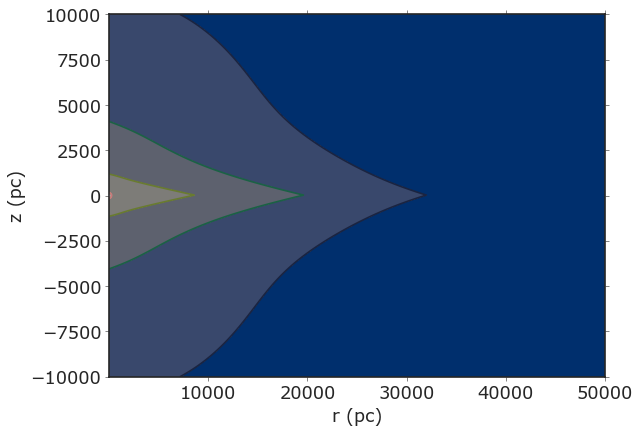

In [6]:
#visualize countours in galaxy model
ax=model.plot_countours(log=True, rmax=50_000, zmax=10000, zmin=-10000, npoints=2000)